# Série 10 - Exercices - Solutions

L'identification de paramètres à partir de données est une des tâches très fréquentes en sciences. Suivant la nature du modèle, différentes méthodes doivent être employées.

Le but de cette série d'exercice est de vous rendre capable d'appliquer les techniques de régression linéaires et non linéaire sur de vraies données.

**Exercice 1**  - Chercher la droite de régression

Soit le jeu de donnée ci-dessous. 

**a)** Faire le graphe de $y$ en fonction de $x$ permettant de visualiser les points de données.

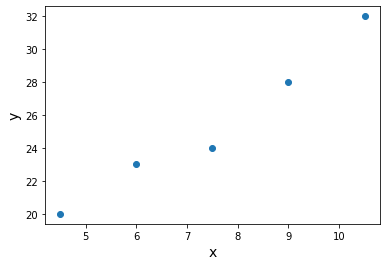

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([4.5, 6., 7.5, 9., 10.5])
y = np.array([20, 23, 24, 28, 32])

plt.plot(x,y,'o')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.show()

**b)** Construisez la matrice dont la première colonne contient les valeurs de $x$ et la deuxième des 1.

$${\bf G} = \left[ \begin{array}{cc} 4.5 & 1\\ 6. & 1\\ 7.5  & 1\\ 9. & 1\\ 10.5 & 1\end{array}\right] $$

In [2]:
N = len(x)
G = np.ones( (N,2) )
G[:,0] = x
print(G)

[[ 4.5  1. ]
 [ 6.   1. ]
 [ 7.5  1. ]
 [ 9.   1. ]
 [10.5  1. ]]


**c)** Estimer les paramètres de la droite avec

$${\bf p} = \left( {\bf G^T} {\bf G} \right) ^{-1} {\bf G^T} {\bf y}$$

Puis faire le graphe pour comparer le modèle avec les données.

MSE= 0.6199999999999993


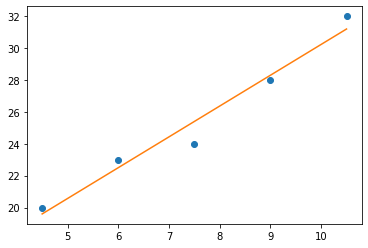

In [3]:
p = np.linalg.inv( G.T @ G ) @  G.T @ y
yc = G @ p
MSE = np.mean( (yc - y)**2 )
plt.plot(x,y,'o');
plt.plot(x,yc,'-');
print("MSE=", MSE)

**Exercice 2** - Ecrire une fonction qui encapsule vos calculs

L'idée est que cette fonction vous permette d'analyser très rapidement n'importe quel jeu de donnée. 
Le prototype de la fonction est donné ci-dessous. Remplir la partie manquante, c'est à dire celle qui fait vraiment le calcul.

Une fois la fonction programmée, vérifier que si vous l'appliquez aux données de l'exercice 2, elle donne les bons résultats.

In [4]:
def fit_line(x,y):
    """
    Computes the least-squares straight line on a data set,
    and plots it with the data for rapid visual control.

    Inputs:
      x (numpy array): The X data values 
      y (numpy array): The Y data values

    Returns:
      p (numpy array): p=[a, b] Slope and intercept of the straight line  
    """
    
    N = len(x)
    G = np.ones( (N,2) )
    G[:,0] = x
    p = np.linalg.inv( G.T @ G ) @  G.T @ y
    yc = G @ p
    MSE = np.mean( (yc - y)**2 )
    
    plt.plot(x,y,'o');
    plt.plot(x,yc,'-');
    
    print("MSE=", MSE)
    
    return p

MSE= 0.6199999999999993


array([ 1.93333333, 10.9       ])

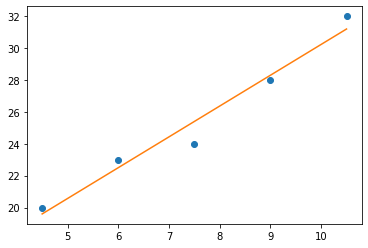

In [5]:
fit_line(x,y)

**Exercice 3** - Age du système solaire

Le fichier `eucrites.txt` contient des données issues de l'analyse chimique de météorites (Eucrites) du système solaire. La première colonne contient le rapport isotopique 87Rb/86Sr des échantillons (87Rb est l'élèment père), alors que la deuxième colonne contient le rapport 87Sr/86Sr (avec 87Sr l'élément fils).

A partir de la pente de la ligne passant à travers ces données, estimer un âge minimum pour le système solaire, sachant que la constante de décroissance radioactive pour ces données est estimée à 

$$\lambda = 1.393 \times 10^{-11} an^{-1}$$

On vous rappelle aussi que l'âge  s'obtient en 

$$t =\frac{ \log( a + 1)}{\lambda} $$

avec $a$ la pente de la droite et log représente le logarithme népérien.

MSE= 6.437605783789232e-10


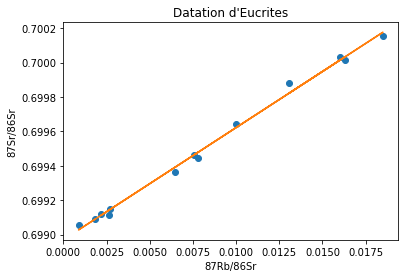

Age: 4.54 milliards d'années


In [7]:
data = np.loadtxt('data/eucrites.txt')
r, s = data[:,0], data[:,1]

p = fit_line(r, s)
plt.xlabel('87Rb/86Sr')
plt.ylabel('87Sr/86Sr')
plt.title("Datation d'Eucrites")
plt.show()

l = 1.393e-11
t = np.log(p[0]+1)/l / 1e9

print(f"Age: {t:4.2f} milliards d'années")

**Exercice 4** - Polynôme d'ordre 2

Recopier la fonction `fit_line` et renomer là en `fit_parabola`. Modifier son contenu pour qu'elle ajuste un polynome d'ordre 2 sur les données. 

Appliquez cette nouvelle fonction aux données du premier exercice. Combien vallent les paramètres ? Quelle est la valeur de l'erreur quadratique moyenne ? 

MSE= 0.26285714285714284


array([ 0.15873016, -0.44761905, 19.11428571])

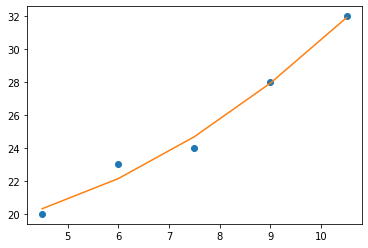

In [8]:
def fit_parabola(x,y):
    """
    Computes the least-squares polynom of order 2 on a data set,
    and plots it with the data for rapid visual control.

    Inputs:
      x (numpy array): The X data values 
      y (numpy array): The Y data values

    Returns:
      p (numpy array): p=[a, b, c]  
    """
    
    N = len(x)
    G = np.ones( (N,3) )
    G[:,0] = x**2
    G[:,1] = x
    p = np.linalg.inv( G.T @ G ) @  G.T @ y
    yc = G @ p
    MSE = np.mean( (yc - y)**2 )
    
    plt.plot(x,y,'o');
    plt.plot(x,yc,'-');
    
    print("MSE=", MSE)
    
    return p

fit_parabola(x,y)

**Exercice 5** - Altération de galets

Une méthode assez étonnante pour dater des conglomérats consiste à mesurer l'épaisseur du halo d'altération autour de galets dans la roche. En effet, l'épaisseur de cette zone altérée dépend de la durée d'exposition à des conditions de surface et à la vitesse du processus d'altération. Il est possible de calibrer cette relation et de s'en servir comme méthode de datation.

Le fichier `alteration_galet.txt` contient des données provenant de Nouvelle Zélande et permettant de calibrer cette relation pour cette région. Le fichier contient dans la première colonne l'épaisseur de la zone altérée en mm  et dans la deuxième colonne l'age en milliers d'années (kA).

Charger les données, ajuster un polynôme d'ordre 2 sur ces données, et utiliser le résultat pour estimer l'age correspondant à une épaisseur de 3mm.

MSE= 0.1747875027954581
Age =  3.58 kA


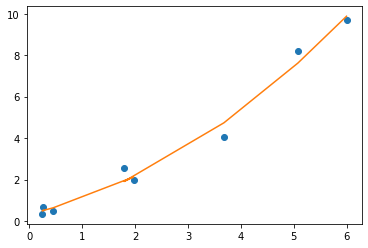

In [10]:
d = np.loadtxt('data/alteration_galet.txt')
xg, yg = d[:,0], d[:,1]

p = fit_parabola(xg,yg)

e = 3
age = p[0] * e**2 + p[1] * e + p[2] 
print(f"Age = {age:5.2f} kA")

**Exercice 6** - Régression non linéaire

La cellule de calcul ci-dessous vous donne un jeu de donnée d'évolution d'une population de bactéries. On vous demande d'ajuster sur ces données un modéle utilisant l'équation logistique :

$$ n(t) = \frac{n_{max}}{1+c \cdot \exp(-rt)}$$
avec 
$$ c = \frac{n_{max}-n_0}{n_0}$$

Quelles valeurs ont les paramètres obtenues ?

In [11]:
t = np.array((0.3,0.5,0.72,0.8,1,1.2,1.5,1.8,2,2.3,2.5,2.7,3)) # Temps en jours
n = np.array((46, 70,  98, 110, 135, 157, 163, 166, 182, 170, 174,  167, 186)) # Nombres de bactéries

In [12]:
def logistique(t, n0, nmax, r):
    c = (nmax - n0) / n0
    return nmax / (1 + c * np.exp(-r * t))

In [13]:
from scipy import optimize

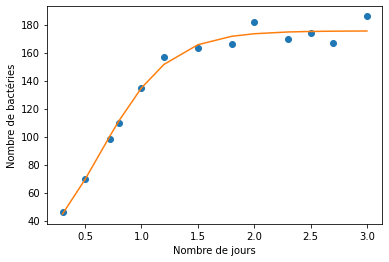

In [14]:
p, Cp = optimize.curve_fit(logistique, t, n, p0=[10, 180, 2])
yc = logistique(t, *p)
plt.plot(t,n,'o')
plt.plot(t,yc,'-')
plt.ylabel('Nombre de bactéries')
plt.xlabel('Nombre de jours')
plt.show()

In [15]:
print("Paramètres identifiés:")
print(f" population initiale: {p[0]:5.1f}")
print(f" population maximale: {p[1]:5.1f}")
print(f" taux de croissance:  {p[2]:5.1f}")

Paramètres identifiés:
 population initiale:  20.1
 population maximale: 175.5
 taux de croissance:    3.2
